# Mapa de atributos, 3 classes Iris, caso 2D

Desenvolva aqui o seu exercício de classificação supervisionada usando a base de dados Iris. O que queremos principalmente é a visualização das regiões do classificador no espaço de atributos. Você encontrará a figura que deve ser gerada nos dois notebooks: <a "href=https://t-adessowiki.fee.unicamp.br/user/lrittner/notebooks/ia368z_2s2017/aluno/week03/Regressao-Logistica-matricial.ipynb">Regressao-Logistica-matricial.ipynb</a> e <a "href=https://t-adessowiki.fee.unicamp.br/user/lrittner/notebooks/ia368z_2s2017/aluno/week03/Regressao-Logistica-Keras.ipynb">Regressao-Logistica-Keras.ipynb</a>. Aproveite para se familiarizar com as duas abordagens. 

Coloque outras coisas que você acha interessante como exercício didático.


## Entrega do exercício

Coloque o seu código aqui neste notebook como entrega do exercício. **Não altere o nome deste notebook**. 

Depois de rodar o notebook, salve a visualização gerada como *my_mapa_atributos.png*. Use o trecho do [código abaixo](#figura) para gerar a figura do **tamanho adequado** e com o **nome certo**, para permitir a correção automática. 

## Visualização do mapa de atributos

<a id='figura'></a>


In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

import keras
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.optimizers import SGD

(<matplotlib.figure.Figure at 0x7fdb20d60f98>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdb20d14eb8>)

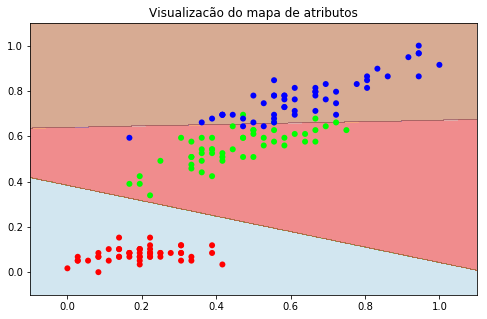

In [92]:
iris = load_iris()
X = iris.data[:,::2]  # comprimento das sépalas e pétalas, indices 0 e 2
Xc = X - X.min(axis=0)
Xc /= Xc.max(axis=0)

Y = iris.target

colors = np.array(['r','y','b'])
#plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y])
#plt.xlabel('Sepal length')
#plt.ylabel('Sepal width')
#plt.show()

Y_oh = np_utils.to_categorical(Y, 3) 
#print(Y[0:5])
#print(Y_oh[0:5])

units = n_classes = 3 
model = Sequential() 
model.add(Dense(units, input_dim=2, activation='softmax',kernel_initializer='zero')) 

sgd = SGD(lr=0.15)
model.compile(optimizer=sgd, loss='categorical_crossentropy') 

n_samples = Xc.shape[0] # number of training examples
batch_size = n_samples 
epochs = 10000
history = model.fit(Xc, Y_oh, batch_size=batch_size, epochs=epochs,verbose=0)

loss = model.evaluate(Xc, Y_oh, verbose=0)
#print('Final loss:',loss)

W = model.get_weights()
#print('Bias:\n', W[1])
#print('W:\n', W[0])


def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - .1, X[:,0].max() + 0.1
    ymin, ymax = X[:,1].min() - .1, X[:,1].max() + 0.1

    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)
    
    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    Z = np.array([list(i).index(max(i)) for i in labels])
    z = Z.reshape(xx.shape)
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)
    
    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    plt.title('Visualizacão do mapa de atributos')
    plt.savefig('my_mapa_atributos.png')
    
    return fig, ax


plot_decision_boundary(Xc, Y_oh, model, steps=1000)

# cria a figura do tamanho adequado para a correção automática
#fig = plt.figure(figsize=(8,5))

#plt.title('Visualizacão do mapa de atributos')
#plt.savefig('my_mapa_atributos.png')

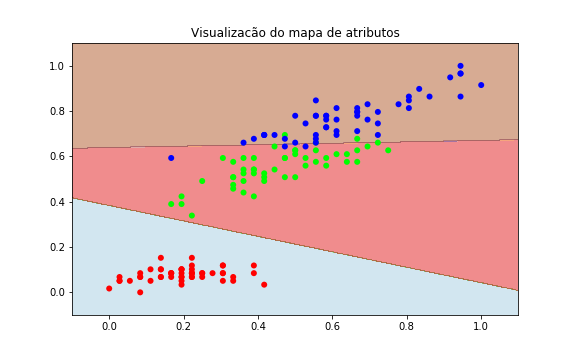

In [94]:
import IPython
img = IPython.display.Image(filename='my_mapa_atributos.png')
img
